In [1]:
from keras import models, layers, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from shared.logger import get_logger
import os

logger = get_logger()

Using TensorFlow backend.


In [2]:
# Constants and Config for index, features, and label
PROJECT_NAME="dogs_cats"
INPUT_DIR="data/{}".format(PROJECT_NAME)
train_dir = "{}/train".format(INPUT_DIR)

# load data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_cats = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = train_cats[3]
img = image.load_img(img_path, target_size=(150, 150))
type(img)

PIL.Image.Image

In [5]:
x = image.img_to_array(img)
logger.info("x.shape started as {}".format(x.shape))
# Add record dimension so it appears like a set going into the generator
x = x.reshape((1, ) + x.shape)
logger.info("x.shape now is {}".format(x.shape))

2018-12-13 14:41:17,282 - INFO - x.shape started as (150, 150, 3)
2018-12-13 14:41:17,283 - INFO - x.shape now is (1, 150, 150, 3)


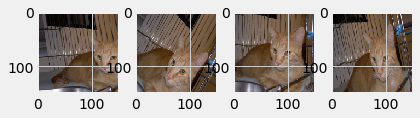

In [6]:
from matplotlib import pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

i = 0
fig = plt.figure()
for batch in train_datagen.flow(x, batch_size=1):
    sp = fig.add_subplot(1, 4, i + 1)
    sp.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()